In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [59]:
def scatter_plot(data, label, title, w=[]):
    cat1_x, cat1_y = [], []
    cat2_x, cat2_y = [], []
    
    for i, feature in enumerate(data):
        if label[i] == 0:
            cat1_x.append(feature[0])
            cat1_y.append(feature[1])
        else:
            cat2_x.append(feature[0])
            cat2_y.append(feature[1])
    
    #plt.scatter(cat0_x, cat0_y, c='r')
    plt.scatter(cat1_x, cat1_y, c='r', marker='D', label='class 0')
    plt.scatter(cat2_x, cat2_y, c='b', marker='^', label='class 1 and 2')
    if w != []:
        line_x = np.linspace(4, 8, 100)
        line_y = -(w[0] * line_x + w[2]) / w[1]
        plt.plot(line_x, line_y, 'k', label='decision boundary')
    plt.legend()
    plt.grid()
    plt.title(title)

150


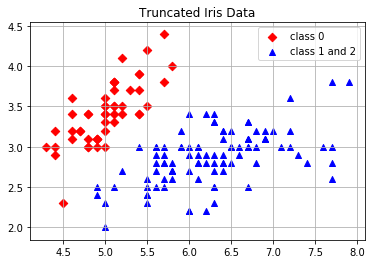

In [60]:
# Load iris dataset for use
# The class '1' and '2' are non-linearly separable classes
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
scatter_plot(X, y, 'Truncated Iris Data')

In [38]:
class LogisticRegression(object):
    def __init__(self, lr=0.1, num_iter=100000, add_bias=True, verbose=True):
        self.lr = lr
        self.num_iter = num_iter
        self.add_bias = add_bias
        self.verbose= verbose
    
    def __add_constant(self, X):
        b = np.ones((X.shape[0], 1))
        return np.concatenate((X, b), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (- y * np.log(h) - (1-y) * np.log(1-h)).mean()
    
    def fit(self, X, y):
        # add constant term to features
        if self.add_bias:
            X = self.__add_constant(X)
        
        # parameters initialization
        self.theta = np.zeros(X.shape[1])
        
        # iterations to update parameter
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if self.verbose and i % 10000 == 0:
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print('Loss: {} \t'.format(self.__loss(h, y)))
    
    def predict_prob(self, X):
        if self.add_bias:
            X = self.__add_constant(X)
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, thresh):
        return self.predict_prob(X) >= thresh

In [39]:
model = LogisticRegression(lr=0.1, num_iter=300000)
%time model.fit(X, y)

Loss: 0.6106419114654529 	
Loss: 0.03445284596677912 	
Loss: 0.02882795048125154 	
Loss: 0.025732610280109966 	
Loss: 0.023408681770059423 	
Loss: 0.021498579861162243 	
Loss: 0.01987785226325258 	
Loss: 0.018484240100021452 	
Loss: 0.017277038827469893 	
Loss: 0.016225243738973754 	
Loss: 0.015303683492572683 	
Loss: 0.014491540946675426 	
Loss: 0.013771574805221605 	
Loss: 0.013129544178512899 	
Loss: 0.012553711220013409 	
Loss: 0.012034402808820274 	
Loss: 0.011563633144406966 	
Loss: 0.011134787467491997 	
Loss: 0.01074236250750362 	
Loss: 0.010381756421228587 	
Loss: 0.010049100144750604 	
Loss: 0.009741122485536843 	
Loss: 0.009455042259083562 	
Loss: 0.00918848190555548 	
Loss: 0.008939398093487198 	
Loss: 0.008706025743869918 	
Loss: 0.008486832669767219 	
Loss: 0.00828048263558777 	
Loss: 0.00808580511900032 	
Loss: 0.007901770431605018 	
Wall time: 4.91 s


In [40]:
preds = model.predict(X, 0.5)
print('Accuracy: {}'.format((preds == y).mean()))

Accuracy: 1.0


c:\python\python35\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  app.launch_new_instance()


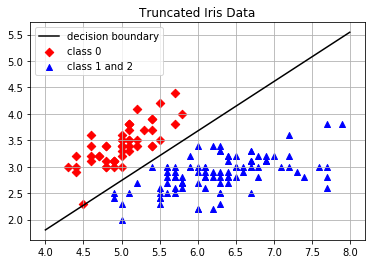

In [61]:
scatter_plot(X, y, 'Truncated Iris Data', w=model.theta)